In [3]:
from matplotlib import pyplot as plt
import numpy as np

from sigproc_kit import *

from my_utils import *

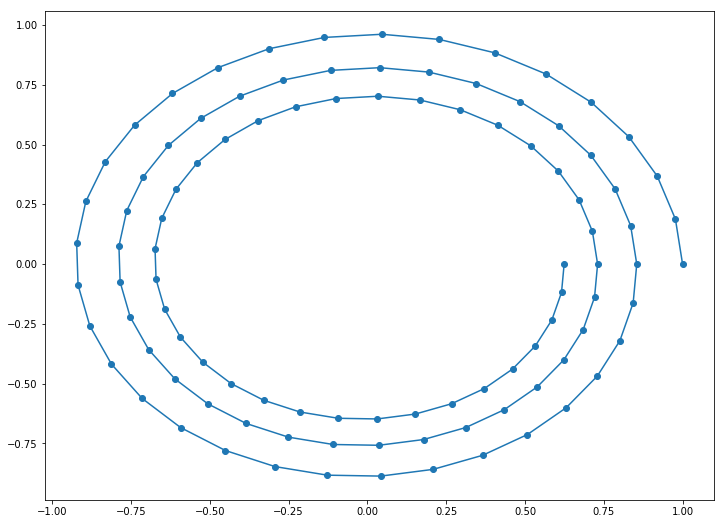

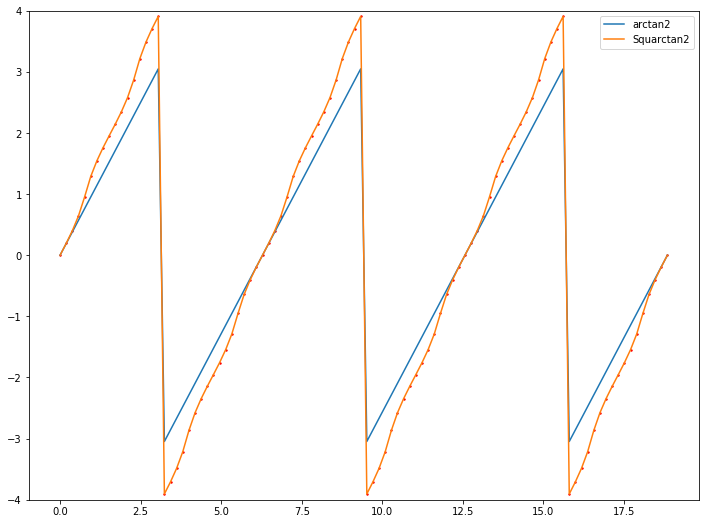

In [30]:
big_figure()

t = np.linspace(0, 3*2*np.pi, 100)
tau = 40
x = np.cos(t) * np.exp(-t/tau)
y = np.sin(t) * np.exp(-t/tau)

plt.scatter(x,y)
plt.plot(x,y)
plt.show()

def squatan(y,x):
    
    o1 = (abs(x) >= abs(y)) * (x>=0) 
    o2 = (abs(x) < abs(y)) * (x>=0) 
    o3 = (abs(x) < abs(y)) * (x<0) 
    o4 = (abs(x) >= abs(y)) * (x<0) 
    
    out = np.zeros(len(x))
    
    yovx = np.abs(y/(x+1e-12))
    xovy = np.abs(x/(y+1e-12))
    
    
    out += o1*yovx
    out += o2*(2-xovy)
    out += o3*(2+xovy)
    out += o4*(4-yovx)
    
    out = out * (y >= 0) - out * (y < 0)
    return out
    

    

plt.plot(t,np.arctan2(y,x),label="arctan2")
plt.plot(t,squatan(y,x),label="Squarctan2")
plt.scatter(t,squatan(y,x),c="red",s=2)
plt.ylim(-4,4)
plt.legend()
plt.show()